**<h1>Install and Import Necessary Libraries  </h1>**


In [8]:
# Install TensorFlow
!pip install tensorflow


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Python312\python.exe -m pip install --upgrade pip


In [1]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import os

 **<h1>Data Augmentation and Loading</h1>**

In [2]:
# Set up paths
train_dir = 'C:/Users/grzeye/Downloads/plant disease CNN-20240818T180156Z-001/plant disease CNN/Train'
test_dir = 'C:/Users/grzeye/Downloads/plant disease CNN-20240818T180156Z-001/plant disease CNN/Test'
validation_dir = 'C:/Users/grzeye/Downloads/plant disease CNN-20240818T180156Z-001/plant disease CNN/Validation'

In [3]:
# Data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [4]:
# Only rescale the test data
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
# Load and preprocess the training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 1322 images belonging to 3 classes.


In [6]:
# Load and preprocess the test data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 175 images belonging to 3 classes.


In [7]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 67 images belonging to 3 classes.


**<h1>Build the CNN Model </h1>**

In [8]:
# Define the CNN model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))  # 3 classes: healthy, powdery, rust

c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [10]:
# Summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,454,147 (13.18 MB)

 Trainable params: 3,454,147 (13.18 MB)

 Non-trainable params: 0 (0.00 B)

**<h1>Train the Model</h1>**

In [11]:
# Train the model
#history = model.fit(
#    train_generator,
#    steps_per_epoch=train_generator.samples // train_generator.batch_size,
#    epochs=20,
#    validation_data=test_generator,
#    validation_steps=test_generator.samples // test_generator.batch_size
#)
# Update model training to use the validation set
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)


Epoch 1/20


c:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 241s 5s/step - accuracy: 0.3909 - loss: 1.1392 - val_accuracy: 0.4375 - val_loss: 1.0709
Epoch 2/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5000 - loss: 0.9501 - val_accuracy: 1.0000 - val_loss: 0.4294
Epoch 3/20


c:\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


41/41 ━━━━━━━━━━━━━━━━━━━━ 218s 5s/step - accuracy: 0.5591 - loss: 0.8409 - val_accuracy: 0.5938 - val_loss: 0.7808
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7500 - loss: 0.6889 - val_accuracy: 0.3333 - val_loss: 0.6177
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 208s 4s/step - accuracy: 0.6797 - loss: 0.6851 - val_accuracy: 0.7812 - val_loss: 0.5778
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7188 - loss: 0.5777 - val_accuracy: 1.0000 - val_loss: 0.5725
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 181s 4s/step - accuracy: 0.7851 - loss: 0.5490 - val_accuracy: 0.8125 - val_loss: 0.6654
Epoch 8/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7812 - loss: 0.4877 - val_accuracy: 0.6667 - val_loss: 2.0914
Epoch 9/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 249s 5s/step - accuracy: 0.8423 - loss: 0.4411 - val_accuracy: 0.8438 - val_loss: 0.5252
Epoch 10/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8438 - loss: 0.3154 - val_accuracy: 1.0000 - val_loss: 0.022

In [12]:
# Update model training to use the validation set
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 216s 5s/step - accuracy: 0.9422 - loss: 0.1763 - val_accuracy: 0.9219 - val_loss: 0.1861
Epoch 2/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8750 - loss: 0.2252 - val_accuracy: 1.0000 - val_loss: 0.0292
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 205s 4s/step - accuracy: 0.9340 - loss: 0.2290 - val_accuracy: 0.9062 - val_loss: 0.2368
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9375 - loss: 0.2063 - val_accuracy: 1.0000 - val_loss: 0.0613
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 206s 4s/step - accuracy: 0.9284 - loss: 0.1920 - val_accuracy: 0.9062 - val_loss: 0.2795
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8750 - loss: 0.1994 - val_accuracy: 1.0000 - val_loss: 3.9059e-05
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 209s 4s/step - accuracy: 0.9222 - loss: 0.2074 - val_accuracy: 0.8594 - val_loss: 0.4070
Epoch 8/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0171 - val_accuracy: 1.0000 - v

**<h1>Evaluate the Model</h1>**

In [13]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc * 100:.2f}%')

6/6 ━━━━━━━━━━━━━━━━━━━━ 24s 4s/step - accuracy: 0.9156 - loss: 0.4716
Test accuracy: 92.57%


**<h1> Save the Model</h1>**

In [14]:
# Save the model
#model.save('plant_disease_classification_model.h5')
model.save('plant_disease_classification_model.keras')

**<h1>Visualize Training Results</h1>**

In [15]:
import matplotlib.pyplot as plt

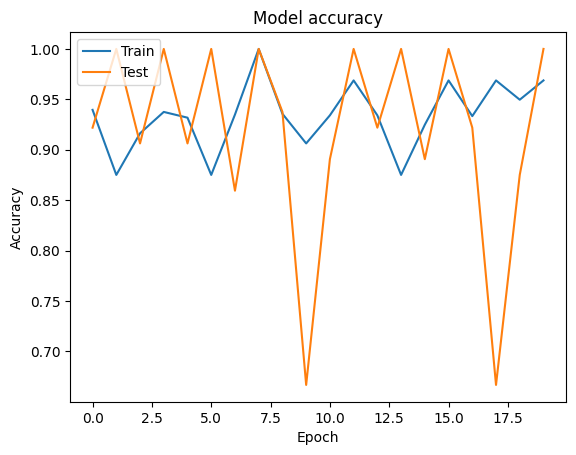

In [16]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

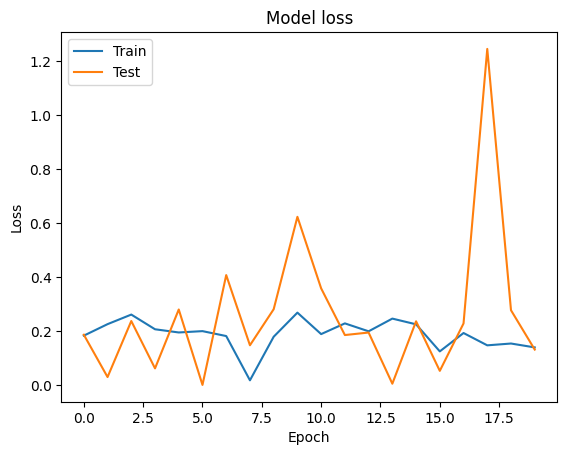

In [17]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

building a Predictive system

In [18]:
#Function to load and Preprocess the image using pillow
def load_and_preprocess_image(image_path,target_size=(150,150)):
    img=Image.open(image_path)
    img=img.resize(target_size)
    img_array=np.array(img)
    img_array=np.expand_dims(img_array,axis=0)
    img_array=img_array.astype('float32')/255.0
    return img_array

def predict_image_class(model, image_path , class_indices ) :
    preprocessed_img=load_and_preprocess_image(image_path)
    predictions=model.predict(preprocessed_img)
    predicted_class_index=np.argmax(predictions, axis=1)[0]
    predicted_class_name=class_indices[predicted_class_index]
    return predicted_class_name

In [19]:
class_indices = { v:k for k, v in train_generator.class_indices.items() }

In [20]:
class_indices

{0: 'Healthy', 1: 'Powdery', 2: 'Rust'}

In [21]:
jsonl.dump(class_indices,open('class_indices.json','w'))

NameError: name 'jsonl' is not defined